<a href="https://colab.research.google.com/github/cul-data-club/meetings/blob/main/2022/march-24-geopandas/Hello%2C%20GeoPandas!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello, GeoPandas (2022 Edition)!

[GeoPandas](https://geopandas.org/en/stable/) is a library that aims to make working with spatial data in Python “easier,” largely be incorporating the [Pandas](https://pandas.pydata.org/) syntax we know and love. 

Google Colab does not ship with GeoPandas, so step one is to install it and a few other libraries, which we'll do in the cell below. If you're trying to install it on your home machine with Anaconda, you'll have to use the `-c conda-forge` flag, like this:

```
conda install -c conda-forge geopandas
```

You can also install from Anaconda Navigator.

In [69]:
# Install geopandas and other spatial libraries
# You only need to run this cell once per session

import sys
!{sys.executable} -m pip install rtree
!{sys.executable} -m pip install geopandas
# !{sys.executable} -m pip install fiona
# !{sys.executable} -m pip install geoplot
# !{sys.executable} -m pip install shapely
# !{sys.executable} -m pip install pyproj

Geographic data can take several primitive forms. The [GeoData@Columbia](https://geodata.library.columbia.edu/) library offers ten different primitive formats the data can take, but they boil down to four, more or less:

1. **Points** With point data, every observation/row/member is at least two coordinates. Each point is independent of the others.
2. **Lines** Instead of one point, every observation/row/member is at least two points connected with a line, where order matters.
3. **Polygons** Like lines, except the lines close to make shapes with calculable areas.
4. **Rasters** “Pictures” of the area under study, where each pixel represents a certain amount of space, like with satellite photography or other remote sensing data sources.

The first three types, as a whole, are called “vector data.”

For vector data, every observation/row/member will typically have other properties that can take familiar data types: numeric variables, continuous variables, and categoric variables.

GeoPandas, then, merges the “geometry” of an observation/row/member with its other properties to create a dataframe with geometries.

Even though geospatial data typically only has the four primitives mentioned above (often in some mixture), the data can be *formatted* in many, many ways. For GeoPandas, we will look at two file formats:

1. **Shapefile** Created by Esri, the company behind ArcGIS, [shapefiles](https://en.wikipedia.org/wiki/Shapefile) are an established vector format. Every shapefile is actually a combination of files, including one that ends in `*.shp`, which are often bundled together as a `.zip`. GeoPandas can read them even as `.zip` files without unbundling.
2. **GeoJSON** A comparative newcomer to geospatial data encoding, [GeoJSON](http://geojson.org/) encodes all of the data into a giant, plain text file formatted as JSON, or JavaScript Object Notation. As such, every GeoJSON data file is also a valid JavaScript object. With only one file, GeoJSON is somewhat more portable than shapefiles, and the file format is especially web-friendly.

You can create your own toy GeoJSON data at [http://geojson.io/](http://geojson.io/)

In fact, go ahead and so so, and save your file as `test.json` or something similar. Then you can upload the file to your Colab.

Now let’s import GeoPandas and fire up inline Matplotlib.

In [70]:
import geopandas
%matplotlib inline

GeoPandas has [three datasets built in](https://geopandas.org/en/stable/docs/reference/api/geopandas.datasets.available.html): two from [Natural Earth](http://naturalearth.org), and one of NYC. Just like with regular Pandas, we can use a [`.read_file()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html) class method to create a geodataframe from a file. Here, we can read in the built-in NYC data.

GeoDataFrames have a built-in [`.plot()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) method.

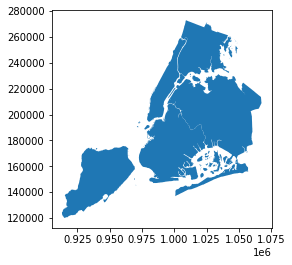

In [71]:
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc.plot()

They also have an [`.explore()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html) method that creates an interactive map with some more context. This relies on a version of [folium](https://python-visualization.github.io/folium/) that's newer than what is installed by default in Colab as of this writing.

In [72]:
import folium
[major, minor, patch] = (int(number) for number in folium.__version__.split("."))
if(major > 0 or minor >= 10):
  nyc.explore("Shape_Area")
else:
  print("Version of folium is too low to use the explore method in GeoPandas.")

Version of folium is too low to use the explore method in GeoPandas.


The GeoPandas documentation features a clarifying graphic that describes how a geoDataFrame differs from a regular Pandas dataFrame:

![GeoDataFrame schematic](https://geopandas.org/en/stable/_images/dataframe.svg)

The index section and the data section work more or less exactly like they do in Pandas, but GeoPandas adds another column for geometry, which holds the spatial information. This is similar to how tables look in [PostGIS](https://postgis.net/). In shapefile language, the geoDataFrame is a combination of the `.shp` file and the `.xbf` files.

Back to GeoPandas. Geodataframes have a [`.crs`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html) property that gives us the coordinate reference system, which yields an EPSG code. These we can subsequently look up like so: [http://spatialreference.org/ref/epsg/2263/](http://spatialreference.org/ref/epsg/2263/)

In [73]:
nyc.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

We can read in our own GeoJSON file now, but note that the CRS is different from the NYC data’s.

In [74]:
gdf = geopandas.read_file("https://raw.githubusercontent.com/cul-data-club/meetings/main/2019/geopandas/test.json")
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Luckily, unifying the CRSes is rather trivial. Just set one’s to the other’s. **Note:** switching CRS is not the same as reprojecting.

In [76]:
gdf = gdf.to_crs(nyc.crs)
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

As mentioned above, geoDataFrames behave much like regular dataFrames.

In [77]:
nyc.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [78]:
gdf.head()

,sentiment,geometry
0,happy,"POLYGON ((995783.359 238221.933, 994655.748 23..."
1,sad,"POLYGON ((984338.938 206523.263, 983845.338 20..."


In [79]:
gdf[gdf.sentiment.str.contains("happy")]

,sentiment,geometry
0,happy,"POLYGON ((995783.359 238221.933, 994655.748 23..."


We can plot data together by using one plot as the `ax` for the other.

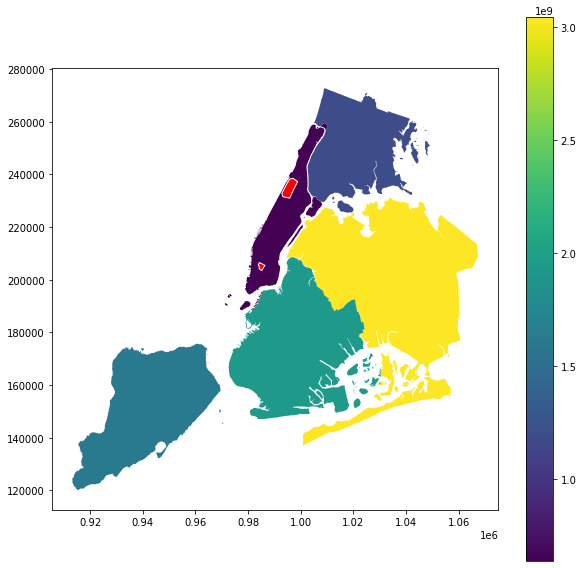

In [80]:
base = nyc.plot("Shape_Area", legend=True, figsize=(10, 10))
gdf.plot(ax=base, color="red", edgecolor="white")

## NYC MTA data

Now let’s grab the [subway station location data](https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49) from the City of New York. Export it as a shapefile and upload the `.zip` to Colab.

In [81]:
stations = geopandas.read_file("./Subway Stations.zip")
stations.head()

,line,name,notes,objectid,url,geometry
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (-73.99107 40.73005)
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2.0,http://web.mta.info/nyct/service/,POINT (-74.00019 40.71880)
2,1-2,50th St,"1-all times, 2-nights",3.0,http://web.mta.info/nyct/service/,POINT (-73.98385 40.76173)
3,2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4.0,http://web.mta.info/nyct/service/,POINT (-73.97500 40.68086)
4,3-4,Pennsylvania Ave,"4-nights, 3-all other times",5.0,http://web.mta.info/nyct/service/,POINT (-73.89489 40.66471)


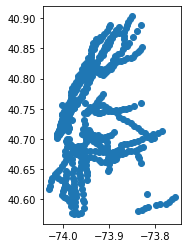

In [82]:
stations.plot()

## Conclusion

And that's about it. The next cell has some commented out methods you can use on a geoDataFrame to do further analysis. I would have included more, but things start breaking.

In [ ]:
# stations["buffered"] = stations.buffer(1000)


Finally, GeoPandas has a [gallery page](https://geopandas.org/en/stable/gallery/index.html) where you can see how others are using it. 

As I've mentioned in emails, GeoPandas is being used in spatial data science courses, as well. Yoh Kawano at UCLA uses it in his [intro to GIS and spatial data science course](https://yohman.github.io/22W-UP206A/).

In [83]:
stations = stations.to_crs(nyc.crs)

In [94]:
stations["buffered"] = stations.buffer(1000)
stations.head()

,line,name,notes,objectid,url,geometry,buffered
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (986725.002 205255.053),"POLYGON ((987725.002 205255.053, 987720.187 20..."
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2.0,http://web.mta.info/nyct/service/,POINT (984196.500 201155.840),"POLYGON ((985196.500 201155.840, 985191.685 20..."
2,1-2,50th St,"1-all times, 2-nights",3.0,http://web.mta.info/nyct/service/,POINT (988724.216 216795.191),"POLYGON ((989724.216 216795.191, 989719.401 21..."
3,2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4.0,http://web.mta.info/nyct/service/,POINT (991184.246 187333.844),"POLYGON ((992184.246 187333.844, 992179.431 18..."
4,3-4,Pennsylvania Ave,"4-nights, 3-all other times",5.0,http://web.mta.info/nyct/service/,POINT (1013411.541 181467.289),"POLYGON ((1014411.541 181467.289, 1014406.725 ..."


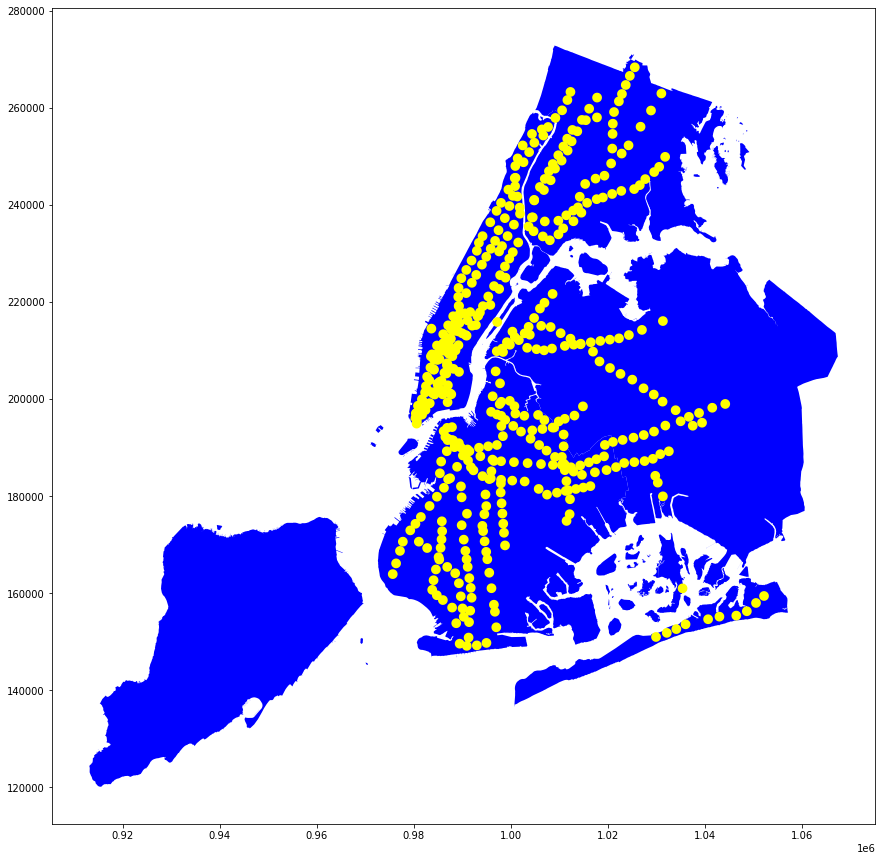

In [95]:
base = nyc.plot(figsize=(15, 15), color="blue")
stations["buffered"].plot(ax=base, color="yellow")

In [96]:
nyc["buffered"] = nyc.buffer(5280)

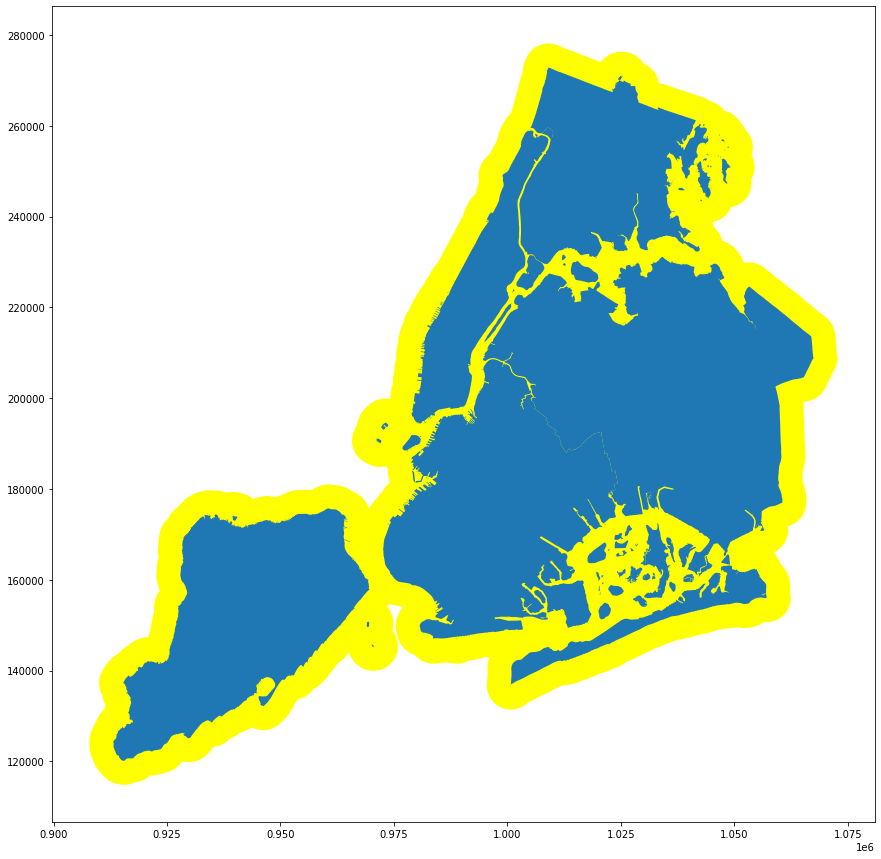

In [98]:
base = nyc["buffered"].plot(figsize=(15,15), color="yellow")
nyc.plot(ax=base)

In [102]:
import contextily as cx

In [103]:
stations = stations.to_crs(epsg=3857)

In [104]:
stations.head()

,line,name,notes,objectid,url,geometry,buffered
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (-8236648.235 4972605.859),"POLYGON ((987725.002 205255.053, 987720.187 20..."
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2.0,http://web.mta.info/nyct/service/,POINT (-8237663.803 4970953.230),"POLYGON ((985196.500 201155.840, 985191.685 20..."
2,1-2,50th St,"1-all times, 2-nights",3.0,http://web.mta.info/nyct/service/,POINT (-8235844.398 4977259.870),"POLYGON ((989724.216 216795.191, 989719.401 21..."
3,2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4.0,http://web.mta.info/nyct/service/,POINT (-8234859.237 4965382.255),"POLYGON ((992184.246 187333.844, 992179.431 18..."
4,3-4,Pennsylvania Ave,"4-nights, 3-all other times",5.0,http://web.mta.info/nyct/service/,POINT (-8225941.072 4963012.202),"POLYGON ((1014411.541 181467.289, 1014406.725 ..."


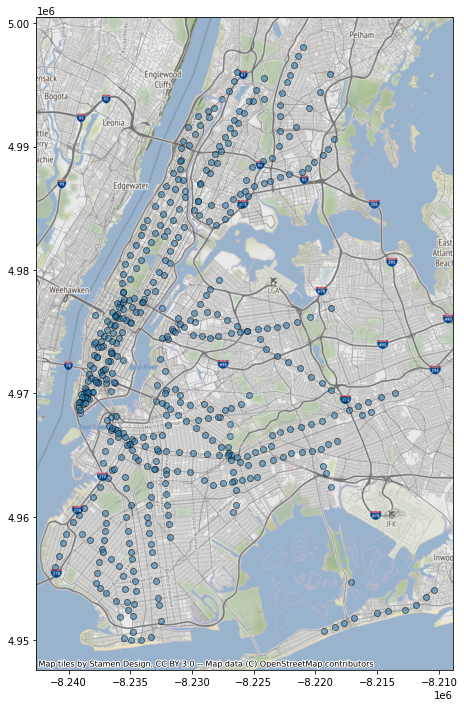

In [107]:
nycwm = nyc.to_crs(epsg=3857)
ax = stations.plot(figsize=(12, 12), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)
nycwm.plot(ax=ax, alpha=0.25, edgecolor="pink", color="none")